# Wetterskip Fryslan
### Tekenen predicted image


## Bibliotheken laden

In [1]:
import numpy as np
import pickle
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

## Laden water prediction Validatie image 1 (obv RandomForrest classification)

In [2]:
filename = 'RandomForrestClassifier_Prediction_Validation1.sav'
ClassArrayPred = pickle.load(open(filename, 'rb')).astype('uint8')
# astype('uint8') is nodig om van de decimals integers te maken.

In [3]:
# open class bestand in ZWART-WIT (convert('l'))
ClassImgVal1 = Image.open("validatie1-class.tif").convert('L')
# zet om naar array (matrix)
ClassArrayVal1 = np.array(ClassImgVal1)
ClassArrayVal1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [4]:
# grootte van het image
ClassImageWidth = 1000
ClassImageHeight= 1000

# grootte van het sliding window
WindowLength = 5
WindowSize = WindowLength**2
# variable ter bepaling van de hoeveelheid pixels naar rechts en naar beneden (de 'slide')
Step = 1 
# tijdelijke teller
Counter = 0 

ClassArrayResult = np.zeros(ClassImageWidth - WindowLength,dtype=np.uint8)

# bepaal hoe groot de output vector wordt en creeer een lege array:
#ClassArrayResult = np.zeros(shape=(((ClassImageWidth - WindowLength) * (ClassImageHeight - WindowLength))))

# voor elke kolom
for i in range(0,ClassImageHeight-WindowLength,Step):
    # voor elke rij
    rij=np.array([],dtype=np.uint8)
    for j in range(0, ClassImageWidth-WindowLength,Step):
        rij = np.concatenate((rij, [ClassArrayPred[Counter]]))
        
        Counter += 1
    
    ClassArrayResult = np.vstack((ClassArrayResult,[rij]))
    

In [5]:
ClassArrayResult.shape

(996, 995)

In [6]:
# vervang alle waarden van 0 door 255
ClassArrayResult[ClassArrayResult == 0] = 255 # wit/geen water
ClassArrayResult[ClassArrayResult < 255] = 0 # zwart/water


In [7]:
img= Image.fromarray(ClassArrayResult,'L')

In [8]:
img.show()

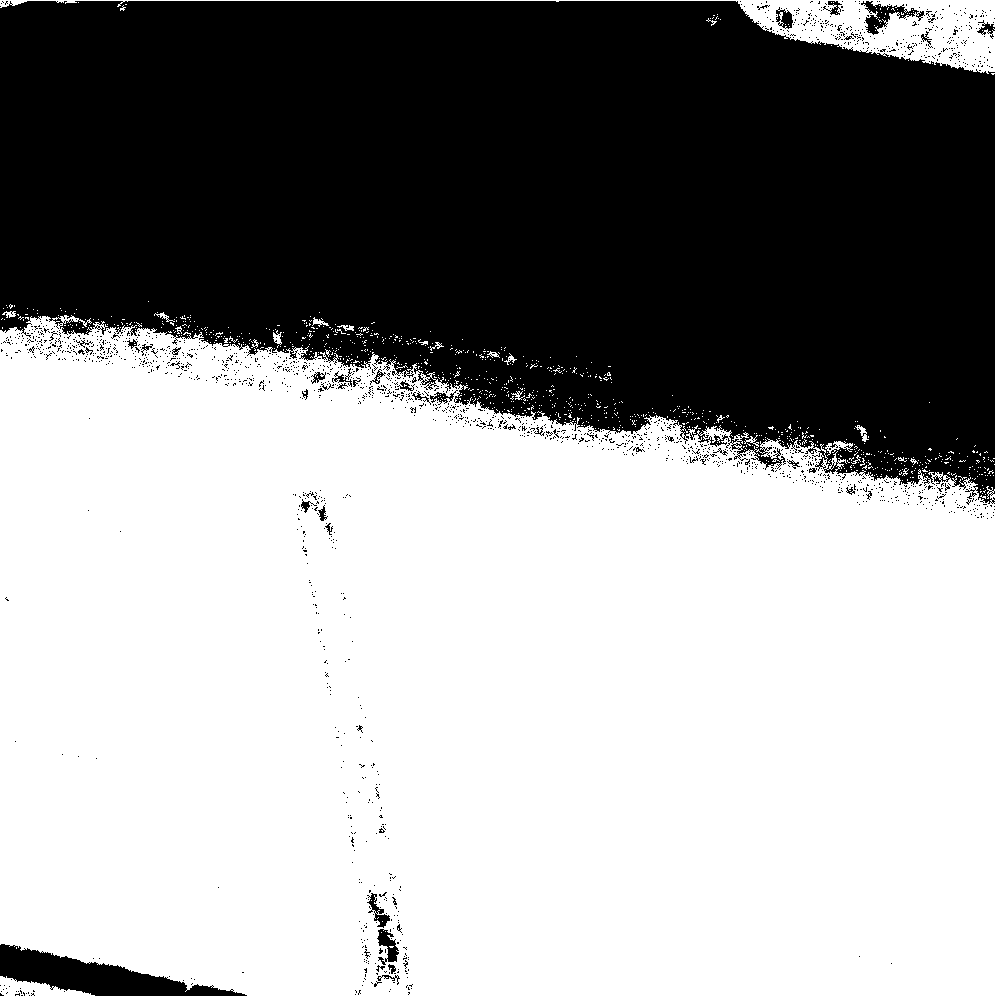

In [9]:
Image.fromarray(ClassArrayResult,'L')